In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# fname = []
# for j in range(3):
#     fname.append('steinmetz_part%d.npz'%j)
# alldat = np.array([])
# for j in range(len(fname)):
#     dat = np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']
#     alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat'])) 
# from numpy import save
# save('data.npy', alldat)

## Loading Dataset

In [3]:
#@title Data Retrieval and Importing Libraries
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)
from matplotlib import rcParams 
import numpy as np
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True
fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
alldat = np.array([])
for j in range(len(fname)):
  dat = np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))  # Stack previous alldat and dat together.

print(alldat.shape)

(39,)


In [4]:
ses = 0 #int(input())
dat = alldat[ses]

In [5]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

In [6]:
def showNeu(nu): 
    for m in range(len(alldat)):
        dat = alldat[m].copy()
        neu_index = []
        for i in range(len(dat['brain_area'])):
            if dat['brain_area'][i] == nu:
                neu_index.append(i)
        exp = []
        for i in range(len(dat['spks'][0])):
            exp.append("exp " + str(i))

        time = []
        for i in range(250):
            time.append(str((i+1)*10) + " ms")
        
        if m == 0:
            ctx = pd.DataFrame(columns=time)

        try:
            net_ctx = np.copy(dat['spks'][neu_index[0]])
            for i in range(1,len(neu_index)):
                net_ctx = np.add(net_ctx , dat['spks'][neu_index[i]])
            temp = pd.DataFrame(net_ctx,index = exp,columns=time)
            temp['response'] = dat['response']
            ctx = pd.concat([ctx,temp],axis=0)
        except:
            pass
    gr = ctx.groupby('response')
    ctx_1 = pd.DataFrame(gr.get_group(1).drop('response',axis = 1).sum(),columns=['response']).reset_index()
    ctx_1['index'] = ctx_1['index'].apply(lambda x : int(x.split()[0]))
    ctx_0 = pd.DataFrame(gr.get_group(0).drop('response',axis = 1).sum(),columns=['response']).reset_index()
    ctx_0['index'] = ctx_0['index'].apply(lambda x : int(x.split()[0]))
    ctx_neg1 = pd.DataFrame(gr.get_group(-1).drop('response',axis = 1).sum(),columns=['response']).reset_index()
    ctx_neg1['index'] = ctx_neg1['index'].apply(lambda x : int(x.split()[0]))

        ## Creating the graph
    plt.figure(figsize=(18,7))
    plt.plot(np.array(list(ctx_1['response'])),'r',label='Left')    
    plt.plot(np.array(list(ctx_neg1['response'])),'b--',label='right')
    plt.plot(np.array(list(ctx_0['response'])),'g.',label='none')
    plt.title(nu)
    plt.ylabel('Number of neurons fired')
    plt.legend()
    plt.savefig(nu+".jpg")
    plt.show()
#     print("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")
    

# 

### Showing the neuron firing trend for different responses for neuron "ZI"

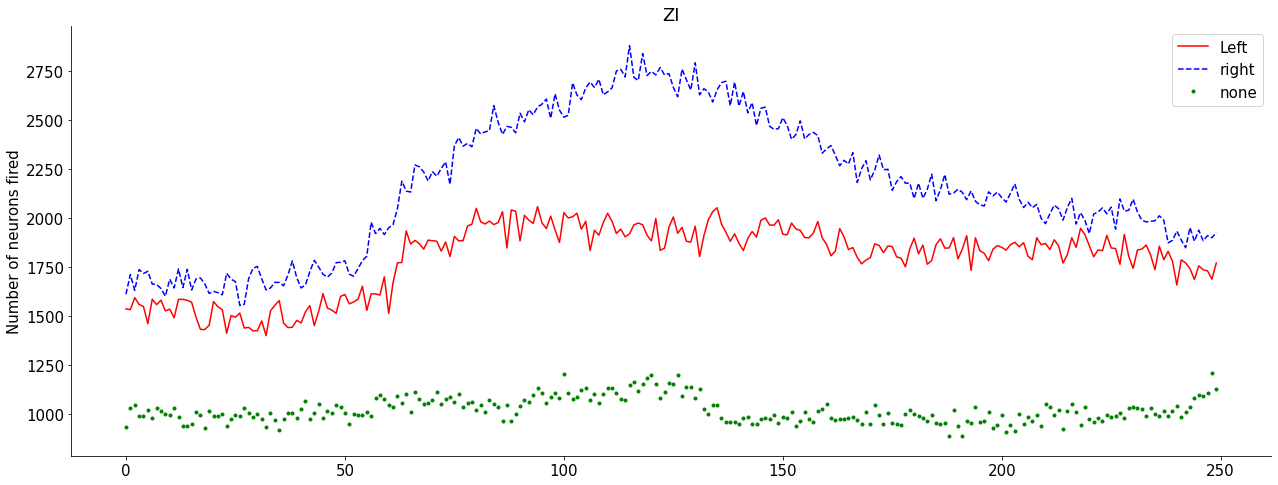

In [7]:
showNeu("ZI")

# 

## To see all the neurons, we explore the neurons.pdf file